In [ ]:
pip install pydub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pydub import AudioSegment
import matplotlib.pyplot as plt
import numpy as np
import os
import librosa
import librosa.display
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir data

In [ ]:

#loading files
audio_segment1=AudioSegment.from_wav("/content/drive/MyDrive/step 0 (normalized blocks)/step1 normalization/approval/appl0000.wav")
audio_segment2=AudioSegment.from_wav("/content/drive/MyDrive/step 0 (normalized blocks)/step1 normalization/disapproval/booh0001.wav")
audio_segment3=AudioSegment.from_wav("/content/drive/MyDrive/step 0 (normalized blocks)/step1 normalization/neutral/neut0001.wav")


In [ ]:
 #Print attributes for approval
print(f"Channels: {audio_segment1.channels}")
print(f"Sample width: {audio_segment1.sample_width}")
print(f"Frame rate (sample rate): {audio_segment1.frame_rate}")
print(f"Frame width: {audio_segment1.frame_width}")
print(f"Length (ms): {len(audio_segment1)}")
print(f"Frame count: {audio_segment1.frame_count()}")
print(f"Intensity: {audio_segment1.dBFS}")

Channels: 1
Sample width: 2
Frame rate (sample rate): 44100
Frame width: 2
Length (ms): 5763
Frame count: 254147.0
Intensity: -19.834069362963064


In [ ]:
 #Print attributes for disapproval
print(f"Channels: {audio_segment2.channels}")
print(f"Sample width: {audio_segment2.sample_width}")
print(f"Frame rate (sample rate): {audio_segment2.frame_rate}")
print(f"Frame width: {audio_segment2.frame_width}")
print(f"Length (ms): {len(audio_segment2)}")
print(f"Frame count: {audio_segment2.frame_count()}")
print(f"Intensity: {audio_segment2.dBFS}")

Channels: 2
Sample width: 2
Frame rate (sample rate): 44100
Frame width: 4
Length (ms): 1829
Frame count: 80639.0
Intensity: -21.942972872799448


In [ ]:
 #Print attributes for neutral
print(f"Channels: {audio_segment3.channels}")
print(f"Sample width: {audio_segment3.sample_width}")
print(f"Frame rate (sample rate): {audio_segment3.frame_rate}")
print(f"Frame width: {audio_segment3.frame_width}")
print(f"Length (ms): {len(audio_segment3)}")
print(f"Frame count: {audio_segment3.frame_count()}")
print(f"Intensity: {audio_segment3.dBFS}")

Channels: 2
Sample width: 2
Frame rate (sample rate): 44100
Frame width: 4
Length (ms): 64720
Frame count: 2854149.0
Intensity: -20.154579165482083


/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


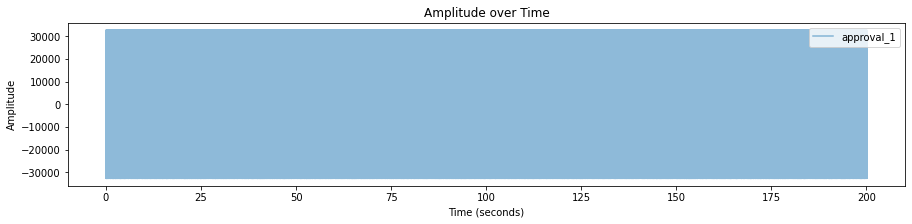

In [ ]:
# Set up plot
f, ax = plt.subplots(figsize=(15, 3))
# Setup the title and axis titles
plt.title('Amplitude over Time')
plt.ylabel('Amplitude')
plt.xlabel('Time (seconds)')
# Add the audio data to the plot
ax = plt.plot(time_sf2, soundwave_sf2, label='disapproval_1', alpha=0.5)
plt.legend()
plt.show()

In [ ]:
x, sr = librosa.load('/content/foot000300000005.wav')
# Spectrogram of frequency
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(15, 3))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()
plt.savefig("spec1.jpg")
print(Xdb)

In [ ]:
#DIVIDING THE AUDIO FILES INTO CHUNKS
from pydub import AudioSegment
from pydub.utils import make_chunks

myaudio = AudioSegment.from_file("/content/drive/MyDrive/step 0 (normalized blocks)/step1 normalization/approval/appl0000.wav" , "wav")
chunk_length_ms = 1000 # pydub calculates in millisec
chunks = make_chunks(myaudio, chunk_length_ms) #Make chunks of one sec

#Export all of the individual chunks as wav files

for i, chunk in enumerate(chunks):
    chunk_name = "chunk{0}.wav".format(i)
    print ("exporting", chunk_name)
    chunk.export(chunk_name, format="wav")
    #chunk.export('example_directory_01' + chunk_name, format="wav")
    #try to save t

exporting chunk0.wav
exporting chunk1.wav
exporting chunk2.wav
exporting chunk3.wav
exporting chunk4.wav
exporting chunk5.wav


In [ ]:
print(freq_data)

[2.76314900e+06 9.29259207e+03 6.05667845e+03 ... 2.47272079e+03
 1.97776634e+03 1.55235854e+03]


In [ ]:
np.median(freq_data)

3663.2388939998273

START RUNNING FROM HERE

In [ ]:

def extract_from_file_name(file_name, index):
    base_file_name = os.path.splitext(file_name)[0]
    features = base_file_name.split('_')
    return features[index]

def load_audios(audio_location):
    audio_paths = []

    for content_file in os.listdir(audio_location):
        if 'wav' in content_file:
            audio_paths.append(content_file)

    print("{} audio files found.".format(len(audio_paths)))

    return audio_paths



In [ ]:
#for all for feature extraction of data
def features(data):
  data,sample_rate=librosa.load(data)
  mel = float(np.mean(np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=1)))
  mfcc = float(np.mean(librosa.feature.mfcc(y=data, sr=sample_rate)))
  c_stft = float(np.mean(librosa.feature.chroma_stft(y=data,sr=sample_rate )))
  c_cqt = float(np.mean(librosa.feature.chroma_cqt(y=data,sr=sample_rate)))
  c_cens = float(np.mean(librosa.feature.chroma_cens(y=data,sr=sample_rate)))
  #print(np.mean(mel))
  #print(mfcc)
  #print(c_stft)
  #print(c_cqt)
  #print(c_cens)
  return mel, mfcc , c_stft,c_cqt,c_cens


In [ ]:
#final dissaproval
import glob

# assign directory
directory = '/content/drive/MyDrive/sound_blocks/disapproval'
list_of_arrays = []


# iterate over files in
# that directory
for filename in glob.iglob(f'{directory}/*'):
    arr = features(filename)
    list_of_arrays.append(arr)

# Step 5: Convert the list of arrays into a DataFrame
dis_df = pd.DataFrame(list_of_arrays, columns=['f0','f1','f2','f3','f4'])
dis_df["target"]=int(2)
dis_df

/usr/local/lib/python3.8/dist-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=690
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=345
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=550
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=275
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=600
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=300
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/librosa/core/spectrum.py:222: UserWar

,f0,f1,f2,f3,f4,target
0,3.096290,-7.382471,0.444388,0.625900,0.281604,2
1,4.632377,-11.050748,0.267163,0.366220,0.224366,2
2,2.465183,-17.696495,0.330935,0.489225,0.260489,2
3,3.520483,-7.322768,0.446334,0.639521,0.283303,2
4,4.828034,-6.508310,0.397751,0.620447,0.274589,2
...,...,...,...,...,...,...
383,2.285934,-7.655735,0.461076,0.642295,0.282799,2
384,4.199607,-7.536085,0.313770,0.528153,0.270175,2
385,4.857620,-7.316216,0.272783,0.503440,0.271668,2
386,4.882772,-7.383396,0.288591,0.493783,0.270329,2


In [ ]:
import glob

# assign directory
directory = '/content/drive/MyDrive/sound_blocks/approval'
list_of_arrays = []

# iterate over files in
# that directory
for filename in glob.iglob(f'{directory}/*'):
    arr = features(filename)
    list_of_arrays.append(arr)

# Step 5: Convert the list of arrays into a DataFrame
app_df = pd.DataFrame(list_of_arrays, columns=['f0','f1','f2','f3','f4'])
app_df["target"]=int(1)
app_df


/usr/local/lib/python3.8/dist-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=690
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=345
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=524
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=262
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=587
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=294
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/librosa/core/spectrum.py:222: UserWar

,f0,f1,f2,f3,f4,target
0,1.081172,-7.120204,0.680698,0.753853,0.287723,1
1,0.959863,-6.558257,0.661967,0.766074,0.287658,1
2,0.885624,-6.590372,0.676322,0.770636,0.287718,1
3,0.907701,-6.995509,0.668329,0.753980,0.287320,1
4,0.844454,-6.508078,0.654847,0.761404,0.287131,1
...,...,...,...,...,...,...
1782,1.013230,-7.517947,0.664972,0.760879,0.287043,1
1783,0.874656,-6.841607,0.658951,0.763943,0.286866,1
1784,0.901775,-6.986522,0.660847,0.764843,0.287110,1
1785,0.916297,-7.177912,0.677263,0.764055,0.287030,1


In [ ]:
import glob

# assign directory
directory = '/content/drive/MyDrive/sound_blocks/neutral'
list_of_arrays = []

# iterate over files in
# that directory
for filename in glob.iglob(f'{directory}/*'):
    arr = features(filename)
    list_of_arrays.append(arr)

# Step 5: Convert the list of arrays into a DataFrame
neu_df = pd.DataFrame(list_of_arrays, columns=['f0','f1','f2','f3','f4'])
neu_df["target"]=int(3)
neu_df


/usr/local/lib/python3.8/dist-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=690
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=345
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=621
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=311
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=599
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=300
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/librosa/core/spectrum.py:222: UserWar

,f0,f1,f2,f3,f4,target
0,1.720606,2.037185,0.538702,0.643988,0.278797,3
1,1.952808,2.652405,0.582997,0.594245,0.269597,3
2,1.498973,1.766093,0.589645,0.680261,0.276640,3
3,2.562036,2.937672,0.500378,0.606555,0.275665,3
4,1.864715,2.821918,0.620245,0.722183,0.281206,3
...,...,...,...,...,...,...
7335,1.275672,-2.170918,0.492680,0.681460,0.284750,3
7336,1.290434,-0.585534,0.520101,0.724953,0.282635,3
7337,1.163247,-0.428505,0.533896,0.717561,0.281436,3
7338,1.324318,-1.359741,0.522031,0.704803,0.284642,3


In [ ]:
data_f = pd.concat([app_df,dis_df,neu_df], axis=0)
data_f

In [ ]:
#plt.imshow(X_train[0][:,:,0])

In [ ]:
data_f.to_csv("/content/drive/MyDrive/sound_blocks/preprocessing data.csv")


In [ ]:
data_f1=pd.read_csv("/content/drive/MyDrive/sound_blocks/preprocessing data.csv")
data_f1


,Unnamed: 0,f0,f1,f2,f3,f4,target
0,0,1.081172,-7.120204,0.680698,0.753853,0.287723,1
1,1,0.959863,-6.558257,0.661967,0.766074,0.287658,1
2,2,0.885624,-6.590372,0.676322,0.770636,0.287718,1
3,3,0.907701,-6.995509,0.668329,0.753980,0.287320,1
4,4,0.844454,-6.508078,0.654847,0.761404,0.287131,1
...,...,...,...,...,...,...,...
9510,7335,1.275672,-2.170918,0.492680,0.681460,0.284750,3
9511,7336,1.290434,-0.585534,0.520101,0.724953,0.282635,3
9512,7337,1.163247,-0.428505,0.533896,0.717561,0.281436,3
9513,7338,1.324318,-1.359741,0.522031,0.704803,0.284642,3


TRAINING AND TESTING

In [ ]:
np.shape(data_f1)

(9515, 7)